In [ ]:
pip install bing_image_downloader

In [ ]:
from bing_image_downloader import downloader
downloader.download("ananya pandey" , limit=500,  output_dir='dataset', 
                    adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to /content/dataset/ananya pandey


[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://img.starbiz.com/resize/750x-/2020/02/17/ana-3-a12d.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img.starbiz.com/resize/750x-/2020/02/17/anan-5845.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://img.starbiz.com/resize/750x-/2020/02/17/ana-2-5fcf.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://img.starbiz.com/resize/750x-/2020/03/02/ananya-pandey-sexy-saree-2ee5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://img.starbiz.com/resize/750x-/2020/02/17/ana-4-9dd6.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://img.starbiz.com/resize/750x-/2020/02/17/ana-376d.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://savedelete.com/wp-content/uploads/2019/10/Ananya-Pandey-at-the-red-carpet-of-Jio-MAMI-Mumbai-Film-Festival-4.jpg
[%] File Downloaded 

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


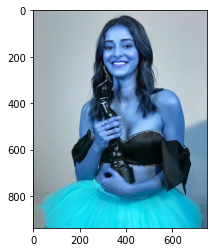

In [ ]:
img = cv2.imread('/content/dataset/ananya pandey/Image_1.jpg')
img.shape
plt.imshow(img)


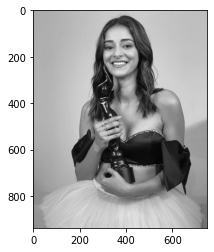

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[271,  77, 200, 200]], dtype=int32)

In [ ]:
(x,y,w,h)=faces[0]
x,y,w,h

(271, 77, 200, 200)

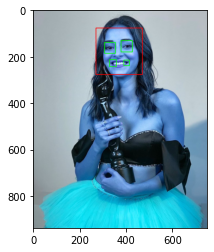

In [ ]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

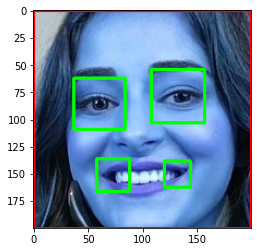

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

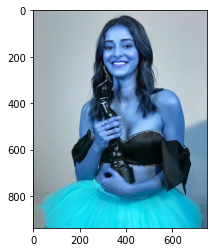

In [ ]:
original_image = cv2.imread('/content/dataset/ananya pandey/Image_1.jpg')
plt.imshow(original_image)

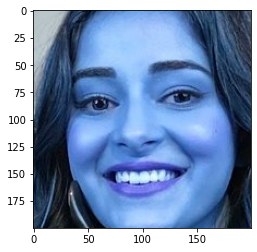

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/dataset/ananya pandey/Image_1.jpg')
plt.imshow(cropped_image)

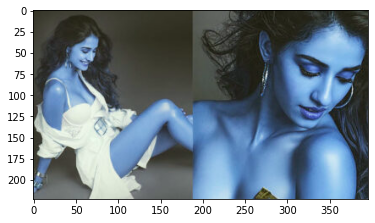

In [ ]:
org_image_obstructed = cv2.imread('/content/dataset/ananya pandey/Image_119.jpg')
plt.imshow(org_image_obstructed)

In [ ]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/content/dataset/ananya pandey/Image_119.jpg')
cropped_image_no_2_eyes

In [ ]:
path_to_data ="/content/dataset"

path_to_cr_data="/content/drive/MyDrive/req"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/dataset/ananya pandey']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

ananya pandey
Generating cropped images in folder:  /content/drive/MyDrive/reqananya pandey
